# Modello di Ising

Simulare con il metodo di Metropolis il modello di Ising

H=−J∑⟨ij⟩SiSj

dove Si=±1, su un reticolo quadrato in $ 2 $ dimensioni con condizioni periodiche. Porre $ J=1 $,  $L=100$, e la temperatura $ T=2.3 $, di poco superiore alla temperatura critica $ T_c=2ln(1+√2)≃2.269 $. Partire dalla condizione iniziale $ S_i≡1 $, e plottare la magnetizzazione ogni $ 10^3 $ step Monte Carlo, fino al tempo massimo di $ 10^6 $ step Monte Carlo.

In [ ]:
import numpy
import matplotlib.pyplot as mpl
%matplotlib inline
from ipywidgets import *

L = 100
N = L*L
STEPS = 10**6


def build_lattice(L):

    lattice = numpy.zeros((L, L))

    for i in range(L): 

        for j in range(L):
        
            lattice[i, j] = 1
            
    return lattice

    
def bc(i):

    if i+1 > L-1:
        return 0
    if i-1 < 0:
        return L-1
    else:
        return i       
    

def delta_energy(lattice, i, j):

    return lattice[i, j] * (lattice[bc(i-1), j] +
                             lattice[bc(i+1), j] +
                             lattice[i, bc(j-1)] +
                             lattice[i, bc(j+1)])

    

def magnetization(T):
    
    M = [N]

    lattice = build_lattice(L)

    for n in range(STEPS):

        for k in range(N):

            i = numpy.random.randint(0, L)
            j = numpy.random.randint(0, L)
            DE = delta_energy(lattice, i, j)
        
            if DE < 0:
            
                lattice[i, j] = -lattice[i, j]
            
            elif numpy.exp(-1/T*DE) > numpy.random.rand(1, 1):
            
                lattice[i, j] = -lattice[i, j]
            
        if n % 10**3 == 0:
        
            M.append(lattice.sum())
            
        if n % 10**5 == 0:
            print("step number ", n, "  still ", 10**6-n)

    print("Mean magnetization = ",numpy.mean(M), "   Standard deviation = ", numpy.std(M))

    mpl.figure()
    mpl.plot(M)
    mpl.title("Magnetization over the number of steps")
    mpl.xlabel("Steps (one everi 1000 Monte-Carlo Steps)")
    mpl.ylabel("Mean magnetization")
    mpl.ylim((-N-5, N+5))
    mpl.grid()
    mpl.show()

magnetization(2.3)

Mean magnetization =  10.5454545455    Standard deviation =  35.970603241


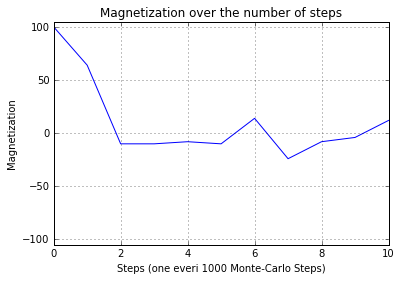

In [1]:
import numpy
import matplotlib.pyplot as mpl
%matplotlib inline
from ipywidgets import *

L = 10
N = L*L
STEPS = 100


def build_lattice(L):

    lattice = numpy.zeros((L, L))

    for i in range(L): 

        for j in range(L):
        
            lattice[i, j] = 1
            
    return lattice

    
def bc(i):

    if i+1 > L-1:
        return 0
    if i-1 < 0:
        return L-1
    else:
        return i       
    

def delta_energy(lattice, i, j):

    return lattice[i, j] * (lattice[bc(i-1), j] +
                             lattice[bc(i+1), j] +
                             lattice[i, bc(j-1)] +
                             lattice[i, bc(j+1)])

    

def magnetization(T):
    
    M = [N]

    lattice = build_lattice(L)

    for n in range(STEPS):

        for k in range(N):

            i = numpy.random.randint(0, L)
            j = numpy.random.randint(0, L)
            DE = delta_energy(lattice, i, j)
        
            if DE < 0:
            
                lattice[i, j] = -lattice[i, j]
            
            elif numpy.exp(-1/T*DE) > numpy.random.rand(1, 1):
            
                lattice[i, j] = -lattice[i, j]
            
        if n % 10 == 0:
        
            M.append(lattice.sum())

    print("Mean magnetization = ",numpy.mean(M), "   Standard deviation = ", numpy.std(M))

    mpl.figure()
    mpl.plot(M)
    mpl.title("Magnetization over the number of steps")
    mpl.xlabel("Steps (one everi 1000 Monte-Carlo Steps)")
    mpl.ylabel("Magnetization")
    mpl.ylim((-N-5, N+5))
    mpl.grid()
    mpl.show()

interact(magnetization, T = (0.1, 5.1, 0.1)); 